Simulating Lorenz system with initial state: [0.1, 0.0, 0.0]


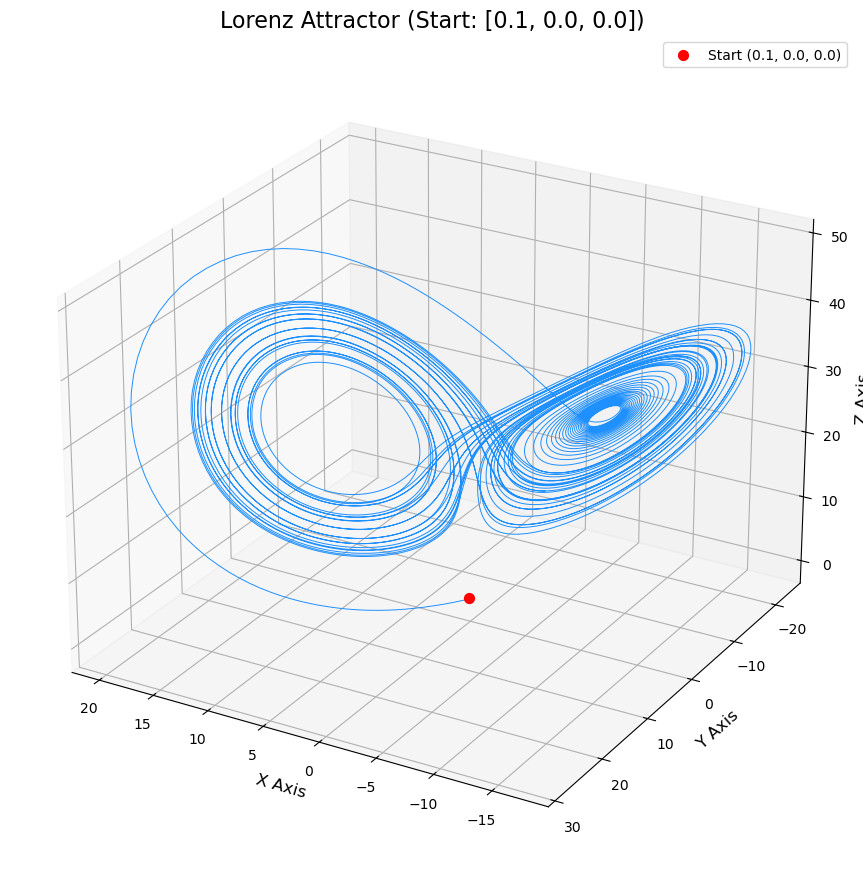


Simulating Lorenz system with initial state: [0.2, 0.0, 0.0]


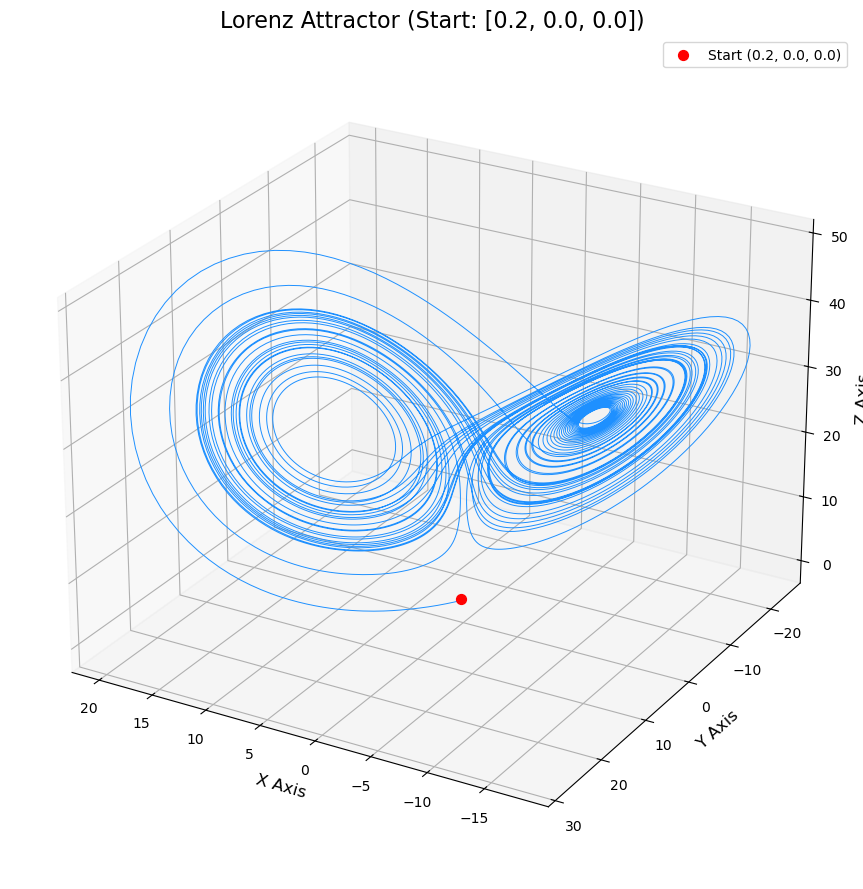

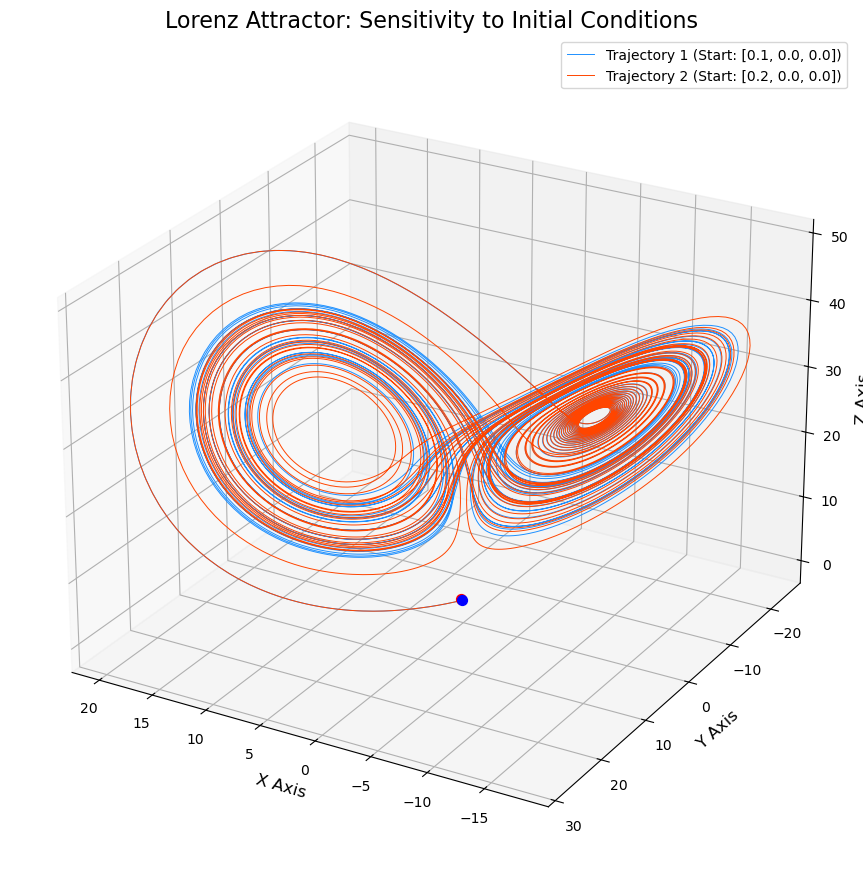

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Lorenz system parameters (classic values)
SIGMA = 10.0
RHO = 28.0
BETA = 8.0 / 3.0

def lorenz_system(t, state, sigma, rho, beta):
    """
    Defines the Lorenz system of differential equations.

    Args:
        t (float): Current time (not directly used in this autonomous system, but required by solve_ivp).
        state (tuple or list): A list or tuple [x, y, z] representing the current state.
        sigma (float): Lorenz system parameter sigma.
        rho (float): Lorenz system parameter rho.
        beta (float): Lorenz system parameter beta.

    Returns:
        list: A list [dx/dt, dy/dt, dz/dt] representing the derivatives of the state.
    """
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

def simulate_lorenz(initial_state, t_span, t_eval_points, sigma=SIGMA, rho=RHO, beta=BETA):
    """
    Simulates the Lorenz system for a given initial state and time span.

    Args:
        initial_state (list): The initial state [x0, y0, z0].
        t_span (tuple): A tuple (t_start, t_end) for the integration time interval.
        t_eval_points (int): Number of points at which to store the computed solution.
        sigma (float, optional): Lorenz parameter sigma. Defaults to SIGMA.
        rho (float, optional): Lorenz parameter rho. Defaults to RHO.
        beta (float, optional): Lorenz parameter beta. Defaults to BETA.

    Returns:
        scipy.integrate.OdeResult: An object containing the solution.
                                   The solution points are in sol.y.
                                   The time points are in sol.t.
    """
    # Create an array of time points for evaluation
    t_eval = np.linspace(t_span[0], t_span[1], t_eval_points)

    # Solve the ODEs
    # We use lambda to pass the additional parameters (sigma, rho, beta) to lorenz_system
    solution = solve_ivp(
        fun=lambda t, state: lorenz_system(t, state, sigma, rho, beta),
        t_span=t_span,
        y0=initial_state,
        method='RK45',  # Explicit Runge-Kutta method of order 5(4)
        t_eval=t_eval,
        dense_output=True # Allows for smooth plotting
    )
    return solution

def plot_lorenz_attractor(solution, title="Lorenz Attractor"):
    """
    Plots the Lorenz attractor in 3D.

    Args:
        solution (scipy.integrate.OdeResult): The solution object from solve_ivp.
        title (str, optional): The title of the plot. Defaults to "Lorenz Attractor".
    """
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from the solution
    x_vals = solution.y[0]
    y_vals = solution.y[1]
    z_vals = solution.y[2]

    # Plot the trajectory
    ax.plot(x_vals, y_vals, z_vals, lw=0.7, color='dodgerblue') # Thinner line for better detail

    # Set labels and title
    ax.set_xlabel("X Axis", fontsize=12)
    ax.set_ylabel("Y Axis", fontsize=12)
    ax.set_zlabel("Z Axis", fontsize=12)
    ax.set_title(title, fontsize=16)

    # Add a starting point marker
    ax.scatter(x_vals[0], y_vals[0], z_vals[0], color='red', marker='o', s=50, label=f'Start ({x_vals[0]:.1f}, {y_vals[0]:.1f}, {z_vals[0]:.1f})')
    ax.legend()

    # Improve layout and aesthetics
    plt.grid(True, linestyle='--', alpha=0.7)
    ax.view_init(elev=25, azim=120) # Adjust viewing angle for better perspective
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # --- Simulation Parameters ---
    # Initial conditions (x0, y0, z0)
    # Small changes here can lead to drastically different trajectories (chaotic behavior)
    initial_state_1 = [0.1, 0.0, 0.0]
    initial_state_2 = [0.2, 0.0, 0.0] # Slightly different initial condition

    # Time span for the simulation (start_time, end_time)
    t_start = 0
    t_end = 50
    t_span = (t_start, t_end)

    # Number of time points to evaluate (more points = smoother curve)
    t_eval_points = 10000

    # --- Run Simulation and Plot ---
    print(f"Simulating Lorenz system with initial state: {initial_state_1}")
    solution1 = simulate_lorenz(initial_state_1, t_span, t_eval_points)
    plot_lorenz_attractor(solution1, title=f"Lorenz Attractor (Start: {initial_state_1})")

    # You can uncomment the following lines to simulate and plot a second trajectory
    # with slightly different initial conditions to observe the butterfly effect.
    print(f"\nSimulating Lorenz system with initial state: {initial_state_2}")
    solution2 = simulate_lorenz(initial_state_2, t_span, t_eval_points)
    plot_lorenz_attractor(solution2, title=f"Lorenz Attractor (Start: {initial_state_2})")

    # --- Plotting both trajectories on the same graph to show divergence ---
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Plot trajectory 1
    ax.plot(solution1.y[0], solution1.y[1], solution1.y[2], lw=0.7, color='dodgerblue', label=f'Trajectory 1 (Start: {initial_state_1})')
    ax.scatter(solution1.y[0,0], solution1.y[1,0], solution1.y[2,0], color='blue', marker='o', s=50)

    # Plot trajectory 2 (if simulated)
    # To see the divergence, simulate solution2 first by uncommenting above
    solution2 = simulate_lorenz(initial_state_2, t_span, t_eval_points) # Ensure this is run
    ax.plot(solution2.y[0], solution2.y[1], solution2.y[2], lw=0.7, color='orangered', label=f'Trajectory 2 (Start: {initial_state_2})')
    ax.scatter(solution2.y[0,0], solution2.y[1,0], solution2.y[2,0], color='red', marker='o', s=50)

    ax.set_xlabel("X Axis", fontsize=12)
    ax.set_ylabel("Y Axis", fontsize=12)
    ax.set_zlabel("Z Axis", fontsize=12)
    ax.set_title("Lorenz Attractor: Sensitivity to Initial Conditions", fontsize=16)
    ax.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    ax.view_init(elev=25, azim=120)
    plt.tight_layout()
    plt.show()
